# Food Sales Predictions
Hannah Ploutz

### Functions

In [102]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics

def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model'):
  
  """Takes a regression model, training features and target and testing 
  features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_pred = pipe.predict(X_test)
  
  metrics = ['train_MAE','test_MAE', 
             'train_RMSE', 'test_RMSE', 
             'train_R2', 'test_R2']
  
  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_pred),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_pred)),4)
  test_r2 = round(r2_score(y_test, test_pred),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[f'{model_name}'])
  scores.loc[f'{model_name}', :] = [train_mae, test_mae,
                                          train_rmse, test_rmse,
                                          train_r2, test_r2]

  return scores

In [103]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [104]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [105]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [106]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict


In [107]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None, ax=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax


In [108]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs



In [109]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax


In [110]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)


  ---
## Prepare the Data for Machine Learning - Revisited

### Imports

In [111]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

### Loading Data

In [112]:
filename_2 = 'sales_predictions_2023.csv'
data = pd.read_csv(filename_2)

### Data Cleaning

**Dropping Duplicates**

I start by cleaning my data and dropping any duplicate rows using an if statement

In [113]:
# If statement where if there are 0 duplicate rows, print: "There are 0 duplicate rows, no need to delete any duplicate rows"
# Otherwise, if there are any duplicate's - drop them and output "x duplicate rows have been dropped". 

if data.duplicated().sum() == 0:
  print(f'There are {data.duplicated().sum()} duplicate rows, no need to delete any duplicate rows.')
else:
  data.drop_duplicates(inplace=True)
  print(f'{data.duplicated().sum()} duplicate rows have been dropped.')

There are 0 duplicate rows, no need to delete any duplicate rows.


**Identifying Missing Values**

Here I will only identify the missing values which will then be dealt with later on in this section - I note that the Item_Weight and Outlet_Size columns are both missing 17% and 28% of their data

In [114]:
# Print statement that identifies how many total missing values
print(f'There are {data.isna().sum().sum()} missing values.')

There are 3873 missing values.


In [115]:
# Print statement that displays the percentage of missing values from each column
print(data.isna().sum()/len(data)*100)

Item_Identifier              0.00
Item_Weight                 17.17
Item_Fat_Content             0.00
Item_Visibility              0.00
Item_Type                    0.00
Item_MRP                     0.00
Outlet_Identifier            0.00
Outlet_Establishment_Year    0.00
Outlet_Size                 28.28
Outlet_Location_Type         0.00
Outlet_Type                  0.00
Item_Outlet_Sales            0.00
dtype: float64


**Fix Inconsistences in Categorical Data**

In this next section I will fix all the inconsistincies in the categorical data. I will adjust the Item_Fat_Content column so that has two clean strings "Low Fat" and "Regular"

In [116]:
# Create filter that contains all the object data types of the data frame
data_types = data.dtypes
object_data_types_filter = data_types[(data_types == "object")]

In [117]:
# View the filter output to check the object columns are all there
object_data_types_filter

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [118]:
# View the index of the object column names 
object_data_types_filter.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [119]:
# For statement that loops through the index and prints out the unique values from each object column
for column in object_data_types_filter.index:
    print(column)
    print(data[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' nan 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [120]:
#Fix the odd spellings in the Item_Fat_Content colomn of low fat and regular to all be consistent
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat', 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [121]:
# For statement that loops through the index and prints out the unique values from each object column
for column in object_data_types_filter.index:
    print(column)
    print(data[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' nan 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




Below I check the numerical columns to see if there are any outliers to take care of, and all seem to be within reason and nothing is sticking out to me as being an outlier from what I can tell. I also check to see if there are any null values in the target column but there are 0 so it's time to move on to the next section.

In [122]:
# Display desriptive statitistics for the numeric columns
data.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,"7,060.00","8,523.00","8,523.00","8,523.00","8,523.00"
mean,12.86,0.07,140.99,"1,997.83","2,181.29"
std,4.64,0.05,62.28,8.37,"1,706.50"
min,4.55,0.00,31.29,"1,985.00",33.29
25%,8.77,0.03,93.83,"1,987.00",834.25
50%,12.60,0.05,143.01,"1,999.00","1,794.33"
75%,16.85,0.09,185.64,"2,004.00","3,101.30"
max,21.35,0.33,266.89,"2,009.00","13,086.96"


In [123]:
# Display desriptive statitistics for the object columns
data.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


In [124]:
# Check target for null values
data['Item_Outlet_Sales'].isna().sum()

0

For my last bit of data cleaning I decide to drop the Item_identifier column as that column is not useful for my process as it contains an id for each product that wont help in the analysis done for machine learning

In [125]:
# Dropping the Item_identifier column 
data = data.drop('Item_Identifier', axis=1)

 ---
 

### Pre-Processing Data

Now that I have confirmed there are no duplicates, cleaned up the categorical data and checked for outliers - I will proceed to Train, Test and Split the data

#### Train/Test/Split

In [126]:
# split X and y, you are predicting calories per serving
X = data.drop(columns=['Item_Outlet_Sales']).copy()
y = data['Item_Outlet_Sales'].copy()

# split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30 , random_state=SEED)

#### Preprocessor & ColumnTransformer

In [127]:
## Make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [128]:
## Make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

In [129]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe, cat_sel),
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000015E8226D700>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000015E9484AFD0>)],
                  verbose_feature_names_out=False)

#### Fit column transformer and run get_feature_names_out

In [130]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_MISSING', 'Outlet_Size_Medium', 'Outlet_Size_Small',
      

In [131]:
#remake the X_train and X_test as dataframes with the new feature names
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7394,10.20,0.00,139.58,"2,009.00",0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2736,7.43,0.08,165.22,"1,997.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
475,14.30,0.13,84.92,"1,997.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
7357,20.50,0.11,192.05,"1,999.00",0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
4532,15.85,0.01,41.05,"2,004.00",0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,12.85,0.01,162.79,"1,985.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
8360,11.50,0.01,174.51,"1,999.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
5929,5.11,0.03,161.12,"2,002.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
4220,6.55,0.03,157.53,"2,007.00",0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


#### LinearRegression

In [132]:
lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,827.25,"1,115.13"
Test,0.56,853.22,"1,156.22"


In [133]:
## Checking the number of coeffs matches the # of feature names
print(len(lin_reg.coef_))
len(feature_names)

43


43

In [134]:
## Saving the coefficients as a pandas series
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs

Item_Weight                          1.32
Item_Visibility                   -239.40
Item_MRP                            15.51
Outlet_Establishment_Year          -14.22
Item_Fat_Content_Low Fat           -17.59
Item_Fat_Content_Regular            17.59
Item_Type_Baking Goods              -6.32
Item_Type_Breads                   -38.06
Item_Type_Breakfast                  7.73
Item_Type_Canned                    34.97
Item_Type_Dairy                    -38.98
Item_Type_Frozen Foods               4.05
Item_Type_Fruits and Vegetables     21.38
Item_Type_Hard Drinks               55.96
Item_Type_Health and Hygiene       -43.81
Item_Type_Household                -67.47
Item_Type_Meat                      -6.30
Item_Type_Others                    21.83
Item_Type_Seafood                  147.75
Item_Type_Snack Foods               -8.96
Item_Type_Soft Drinks              -98.88
Item_Type_Starchy Foods             15.12
Outlet_Identifier_OUT010          -407.86
Outlet_Identifier_OUT013          

In [135]:
# use .loc to add the intercept to the series
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs

Item_Weight                            1.32
Item_Visibility                     -239.40
Item_MRP                              15.51
Outlet_Establishment_Year            -14.22
Item_Fat_Content_Low Fat             -17.59
Item_Fat_Content_Regular              17.59
Item_Type_Baking Goods                -6.32
Item_Type_Breads                     -38.06
Item_Type_Breakfast                    7.73
Item_Type_Canned                      34.97
Item_Type_Dairy                      -38.98
Item_Type_Frozen Foods                 4.05
Item_Type_Fruits and Vegetables       21.38
Item_Type_Hard Drinks                 55.96
Item_Type_Health and Hygiene         -43.81
Item_Type_Household                  -67.47
Item_Type_Meat                        -6.30
Item_Type_Others                      21.83
Item_Type_Seafood                    147.75
Item_Type_Snack Foods                 -8.96
Item_Type_Soft Drinks                -98.88
Item_Type_Starchy Foods               15.12
Outlet_Identifier_OUT010        

In [136]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs

Item_Weight                            1.32
Item_Visibility                     -239.40
Item_MRP                              15.51
Outlet_Establishment_Year            -14.22
Item_Fat_Content_Low Fat             -17.59
Item_Fat_Content_Regular              17.59
Item_Type_Baking Goods                -6.32
Item_Type_Breads                     -38.06
Item_Type_Breakfast                    7.73
Item_Type_Canned                      34.97
Item_Type_Dairy                      -38.98
Item_Type_Frozen Foods                 4.05
Item_Type_Fruits and Vegetables       21.38
Item_Type_Hard Drinks                 55.96
Item_Type_Health and Hygiene         -43.81
Item_Type_Household                  -67.47
Item_Type_Meat                        -6.30
Item_Type_Others                      21.83
Item_Type_Seafood                    147.75
Item_Type_Snack Foods                 -8.96
Item_Type_Soft Drinks                -98.88
Item_Type_Starchy Foods               15.12
Outlet_Identifier_OUT010        

In [137]:
#checking for multicolunearity 
data.select_dtypes('object').nunique()
#checks to see if our categories have more than 1 option

Item_Fat_Content         2
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

- This seems about right with the data and number of categorical values there are

In [138]:
coeffs = get_coeffs_linreg(lin_reg)
coeffs

Outlet_Type_Grocery Store           -873.62
Outlet_Identifier_OUT019            -465.76
Outlet_Identifier_OUT010            -407.86
Outlet_Location_Type_Tier 1         -252.17
Outlet_Size_MISSING                 -246.31
Item_Visibility                     -239.40
Item_Type_Soft Drinks                -98.88
Outlet_Type_Supermarket Type2        -95.09
Outlet_Identifier_OUT018             -95.09
Outlet_Size_Small                    -94.88
Outlet_Identifier_OUT049             -76.92
Outlet_Identifier_OUT013             -68.68
Outlet_Size_High                     -68.68
Item_Type_Household                  -67.47
Item_Type_Health and Hygiene         -43.81
Outlet_Identifier_OUT045             -43.40
Item_Type_Dairy                      -38.98
Item_Type_Breads                     -38.06
Item_Fat_Content_Low Fat             -17.59
Outlet_Establishment_Year            -14.22
Item_Type_Snack Foods                 -8.96
Item_Type_Baking Goods                -6.32
Item_Type_Meat                  

##### Impactful Coefficients

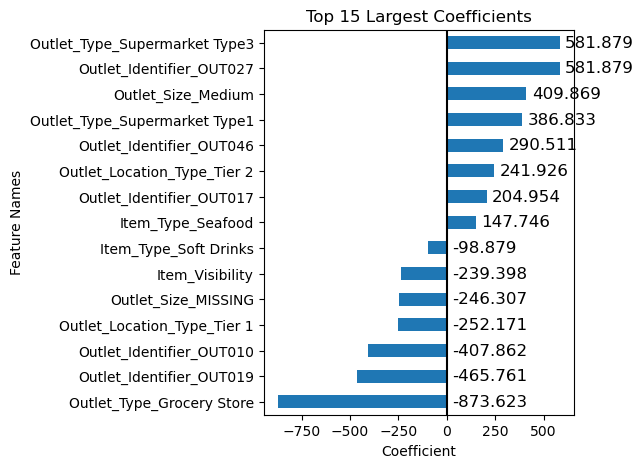

In [139]:
ax = plot_coeffs(coeffs,top_n=15)
annotate_hbars(ax)
#use custom function to annotate the bars in the chart

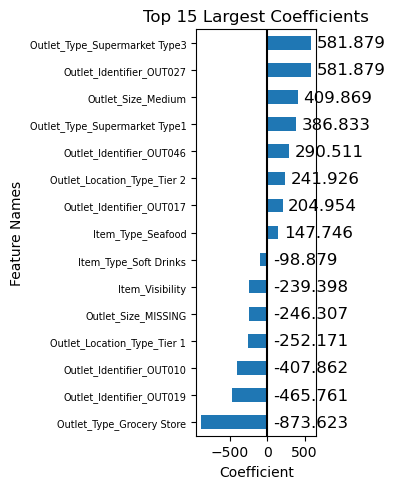

In [160]:
# Create a new figure
fig, ax = plt.subplots(figsize=(500,100))

plot_coeffs(coeffs, top_n=15, annotate=True)

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.7, top=0.9)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)  # Experiment with fontsize as per your needs
plt.tight_layout()

In [161]:
#save the chart as a png file
fig.savefig('LinearRegressionAnalysis.png',dpi=150)

**Interpretation**

- The feature "Outlet_identifier_OUT027" has a high coefficient, indicating that as the value of this outlet identifier increases, the target variable (food sales) tends to increase. The coefficient value of 581.879 suggests that this specific outlet has a significant impact on food sales, with higher values of this identifier associated with higher sales.

- Similarly, the feature "Supermarket Type 3" has a coefficient of 581.879, indicating a high positive relationship with food sales. As the presence of Supermarket Type 3 increases, the target variable also tends to increase. This type of store has a substantial impact on food sales.

- The feature "Outlet Size Medium" has a coefficient of 409.869, indicating a high positive impact on the target variable. When an outlet is categorized as medium-sized, it tends to positively influence food sales. Increasing the size of the outlet within the medium range is associated with higher food sales.

- Interestingly, the feature "Outlet_type_grocery store" has the greatest impact with a negative coefficient of -873.623. This indicates a strong negative correlation with the target variable (food sales). In other words, when the outlet type is a grocery store, food sales tend to decrease. This negative coefficient suggests that the presence of a grocery store has a detrimental effect on food sales.

#### RandomForest

Split,R^2,MAE,RMSE
Train,0.94,290.45,421.86
Test,0.56,817.45,"1,163.35"


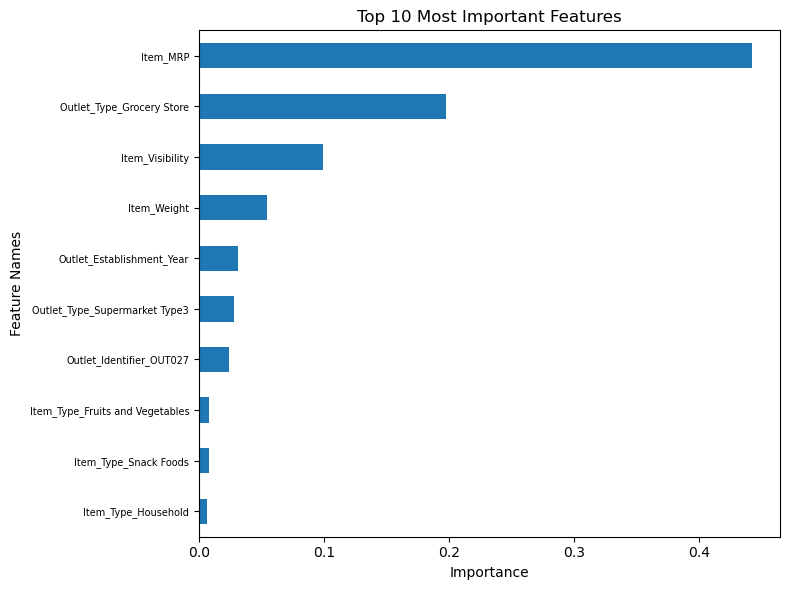

In [173]:
# Create a new figure
fig, ax = plt.subplots()
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10)

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.7, top=0.9)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)
plt.tight_layout()

#save the chart as a png file
fig.savefig('RandomForestFeatureAnalysis.png',dpi=150);

In [163]:
importances.sort_values(ascending=False).head(5)

Item_MRP                    0.44
Outlet_Type_Grocery Store   0.19
Item_Visibility             0.10
Item_Weight                 0.05
Outlet_Establishment_Year   0.03
Name: Feature Importance, dtype: float64

In [164]:
#before completing EDA, put the DF back together for plotting to include train and test values
plot_train = pd.concat([X_train_df,y_train],axis=1)
plot_test = pd.concat([X_test_df,y_test],axis=1)
plot_df = pd.concat([plot_train, plot_test])
plot_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
7394,10.20,0.00,139.58,"2,009.00",0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,"4,495.48"
2736,7.43,0.08,165.22,"1,997.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,"2,840.97"
475,14.30,0.13,84.92,"1,997.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,"1,193.11"
7357,20.50,0.11,192.05,"1,999.00",0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,"1,549.98"
4532,15.85,0.01,41.05,"2,004.00",0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,479.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,6.38,0.08,109.06,"2,009.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,"1,941.47"
6708,12.85,0.14,93.81,"1,985.00",1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,"3,237.12"
8255,16.20,0.06,98.17,"2,007.00",1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"2,696.49"
7812,17.75,0.16,239.32,"1,998.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,723.06


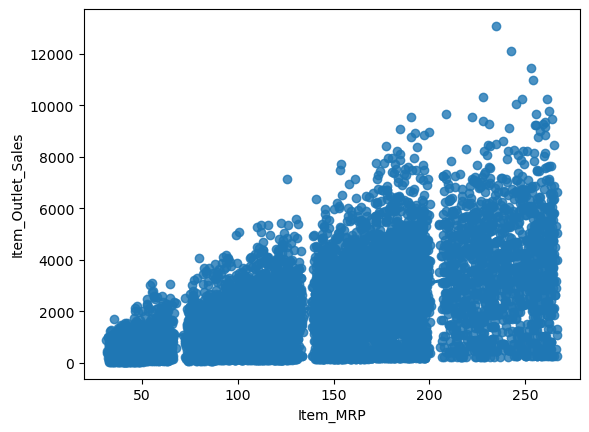

In [165]:
sns.regplot(data=plot_df, x='Item_MRP',y='Item_Outlet_Sales');

- The model relied on the higher MRP importance to make its predicitions and to split the samples to predict the final grade

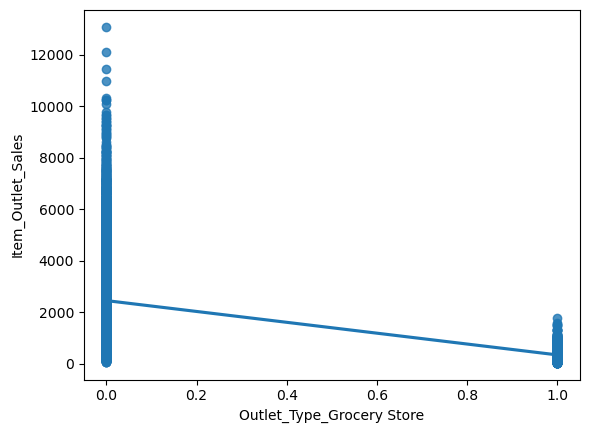

In [166]:
sns.regplot(data=plot_df, x='Outlet_Type_Grocery Store',y='Item_Outlet_Sales');

- The Type of grocery store was predominantly the 0.0 value that was used to predict the final grade

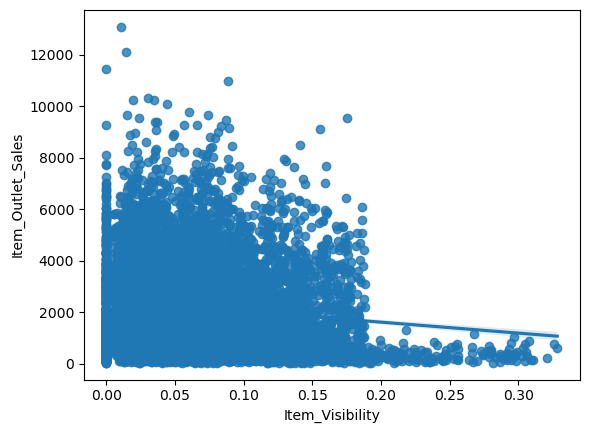

In [167]:
sns.regplot(data=plot_df, x='Item_Visibility',y='Item_Outlet_Sales');

- The lower end of the Item_Visibility was used by the model in predicting final grade

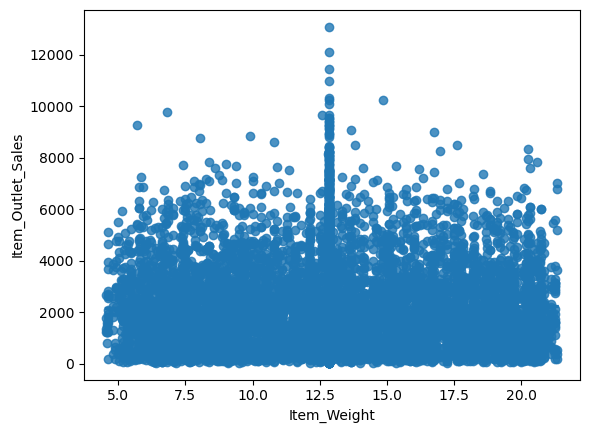

In [168]:
sns.regplot(data=plot_df, x='Item_Weight',y='Item_Outlet_Sales');

- Item weight was fairly evenly distributed, with a spike right in the middle around 12.5

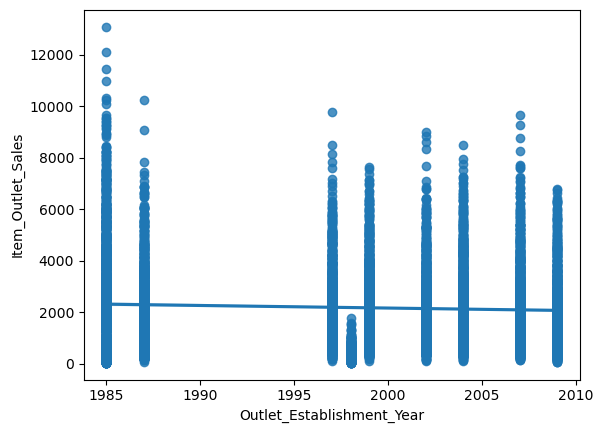

In [169]:
sns.regplot(data=plot_df, x='Outlet_Establishment_Year',y='Item_Outlet_Sales');

- This indicates that if the year of the Outlet was established was 1995, that was of a greater importance on the model making its predictions

#### Serialization

In [170]:
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForestRegressor':reg,
         'LinearRegression':lin_reg}
joblib.dump(export, 'best-models.joblib')

['best-models.joblib']

In [171]:
loaded = joblib.load('best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor', 'LinearRegression'])

In [172]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForestRegressor']